In [223]:
%matplotlib inline
from obspy.core import read
from obspy.core import UTCDateTime
from ykolutils.signalprocessing.fft import simplefft
import pandas as pd
import numpy as np
from scipy.signal import detrend
from scipy import signal
from scipy.signal import filter_design as fd
import datetime


import matplotlib.pylab as plt

In [224]:
stats_100_1000 = pd.io.parsers.read_csv('D:\\Work\\PythonExp\\InfluxdbTest\\stats_100_1000.log',
                                       sep=',',
                                       skiprows=5,
                                       index_col=0,
                                       parse_dates=True,
                                       names=['Num_of_points','DB_size'])

stats_100_5000 = pd.io.parsers.read_csv('D:\\Work\\PythonExp\\InfluxdbTest\\stats_100_5000.log',
                                       sep=',',
                                       skiprows=5,
                                       index_col=0,
                                       parse_dates=True,
                                       names=['Num_of_points','DB_size'])

stats_10_1000 = pd.io.parsers.read_csv('D:\\Work\\PythonExp\\InfluxdbTest\\stats_10_1000.log',
                                       sep=',',
                                       skiprows=5,
                                       index_col=0,
                                       parse_dates=True,
                                       names=['Num_of_points','DB_size'])

stats_10_5000 = pd.io.parsers.read_csv('D:\\Work\\PythonExp\\InfluxdbTest\\stats_10_5000.log',
                                       sep=',',
                                       skiprows=5,
                                       index_col=0,
                                       parse_dates=True,
                                       names=['Num_of_points','DB_size'])



In [225]:
stats_100_1000.head()


,Num_of_points,DB_size
2015-05-29 18:08:57,481,11240.808594
2015-05-29 18:10:05,6431528,11561.410156
2015-05-29 18:11:17,11684553,11907.816406
2015-05-29 18:12:31,16810578,12274.562500
2015-05-29 18:13:40,22033603,12631.093750


In [226]:
stats_100_5000.head()

,Num_of_points,DB_size
2015-05-29 20:52:03,21,30722.410156
2015-05-29 20:54:00,9475070,31297.867188
2015-05-29 20:56:02,20125120,31912.460938
2015-05-29 20:57:37,30715170,32413.679688
2015-05-29 20:59:29,41360220,32502.976562


In [227]:
def shift_points(dataframe):
    dataframe['DB_size'] = dataframe['DB_size'] - dataframe['DB_size'][0]
    return dataframe
    

def shift_index(dataframe):
    dataframe.index = dataframe.index.astype(np.int64) // 10**9
    dataframe=dataframe.shift(periods=1, freq=-dataframe.index[0])
    return dataframe

In [228]:
# Shifting indices
stats_100_1000 = shift_index(stats_100_1000)
stats_100_5000 = shift_index(stats_100_5000)

stats_10_1000 = shift_index(stats_10_1000)
stats_10_5000 = shift_index(stats_10_5000)

#Shifting points
stats_100_1000 = shift_points(stats_100_1000)
stats_100_5000 = shift_points(stats_100_5000)

stats_10_1000 = shift_points(stats_10_1000)
stats_10_5000 = shift_points(stats_10_5000)


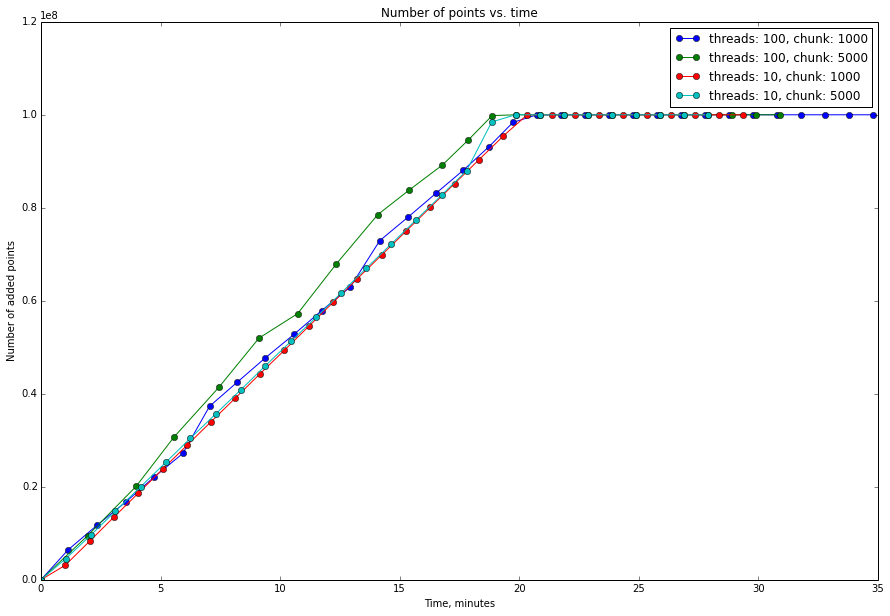

In [229]:
plt.figure(figsize=(15,10))
plt.plot(stats_100_1000.index/60, stats_100_1000['Num_of_points'], '-o', label='threads: 100, chunk: 1000')
plt.plot(stats_100_5000.index/60, stats_100_5000['Num_of_points'],'-o', label='threads: 100, chunk: 5000')
plt.plot(stats_10_1000.index/60, stats_10_1000['Num_of_points'],'-o', label='threads: 10, chunk: 1000')
plt.plot(stats_10_5000.index/60, stats_10_5000['Num_of_points'],'-o', label='threads: 10, chunk: 5000')
plt.legend()

plt.xlabel('Time, minutes')
plt.ylabel('Number of added points')
plt.title('Number of points vs. time')

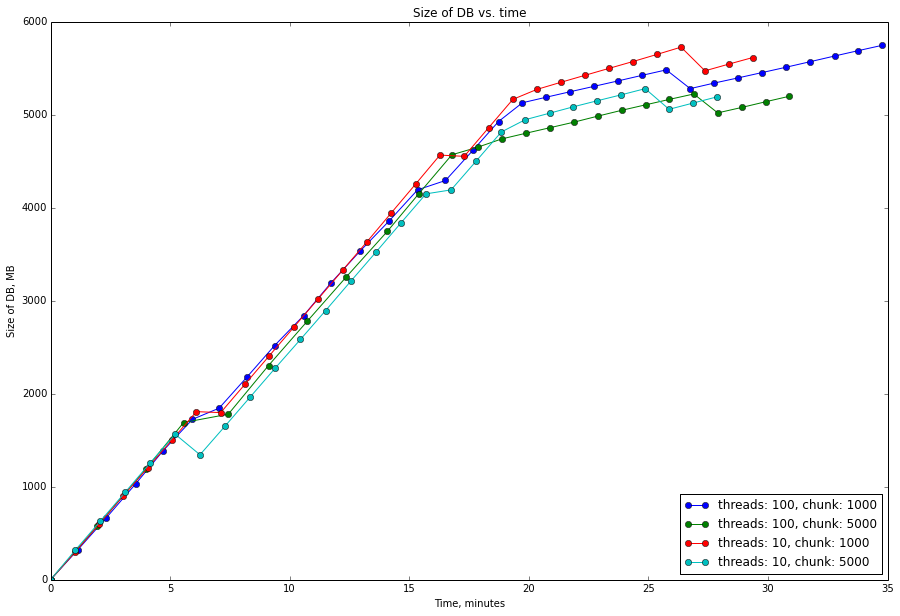

In [230]:
plt.figure(figsize=(15,10))
plt.plot(stats_100_1000.index/60, stats_100_1000['DB_size'], '-o', label='threads: 100, chunk: 1000')
plt.plot(stats_100_5000.index/60, stats_100_5000['DB_size'],'-o', label='threads: 100, chunk: 5000')
plt.plot(stats_10_1000.index/60, stats_10_1000['DB_size'],'-o', label='threads: 10, chunk: 1000')
plt.plot(stats_10_5000.index/60, stats_10_5000['DB_size'],'-o', label='threads: 10, chunk: 5000')
plt.legend(loc='lower right')

plt.xlabel('Time, minutes')
plt.ylabel('Size of DB, MB')
plt.title('Size of DB vs. time')

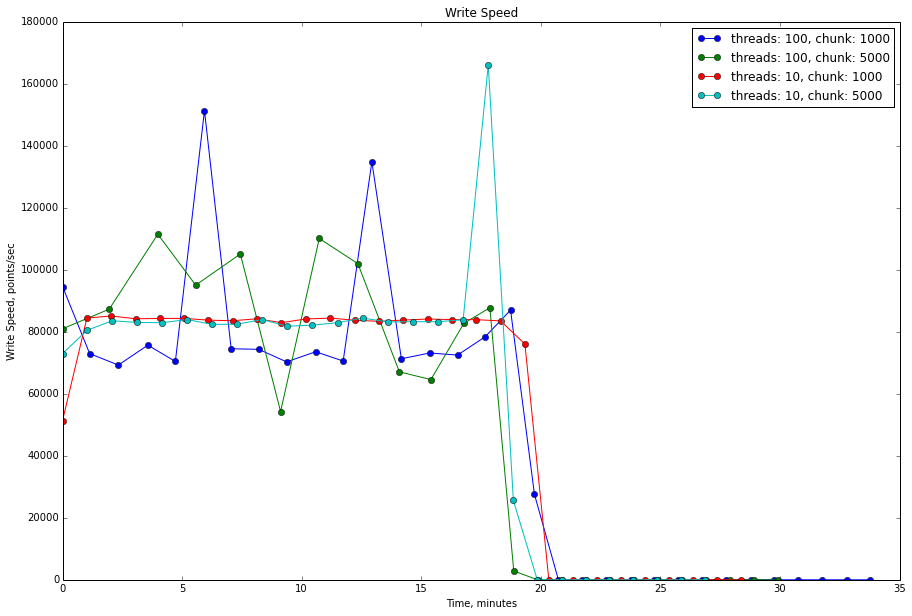

In [231]:
v_100_1000 = np.diff(stats_100_1000['Num_of_points']) / np.diff(stats_100_1000.index)
v_100_5000 = np.diff(stats_100_5000['Num_of_points']) / np.diff(stats_100_5000.index)
v_10_1000 = np.diff(stats_10_1000['Num_of_points']) / np.diff(stats_10_1000.index)
v_10_5000 = np.diff(stats_10_5000['Num_of_points']) / np.diff(stats_10_5000.index)


plt.figure(figsize=(15,10))
plt.plot(stats_100_1000.index[:-1] / 60,v_100_1000, '-o', label='threads: 100, chunk: 1000')
plt.plot(stats_100_5000.index[:-1] / 60,v_100_5000, '-o', label='threads: 100, chunk: 5000')
plt.plot(stats_10_1000.index[:-1] / 60,v_10_1000, '-o', label='threads: 10, chunk: 1000')
plt.plot(stats_10_5000.index[:-1] / 60,v_10_5000, '-o', label='threads: 10, chunk: 5000')
plt.legend()

plt.xlabel('Time, minutes')
plt.ylabel('Write Speed, points/sec')
plt.title('Write Speed')